# Actividad 3.3

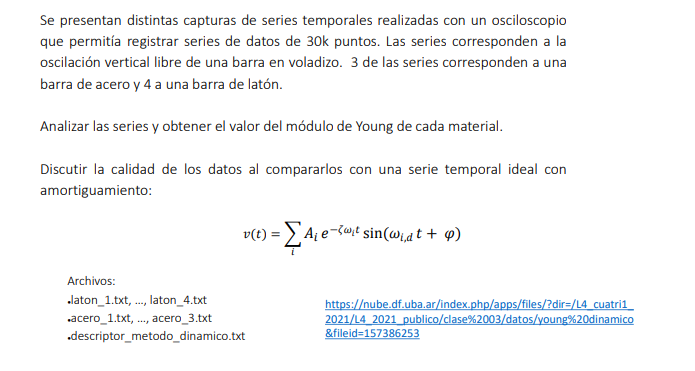

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib

L_l = 255 #mm logitud
L_a = 240 #mm longitud

d_l = 4.6 #mm diametro
d_a = 4.0 #mm diametro

er_L = 2  #mm
er_d = 0.2 #mm

r_l = 7850 #km/m^3 densidad
r_a = 8730 #km/m^3 densidad

E_l = 110e9# pa
E_a = 200e9# pa
#A = area transversal entiendo yo $pi*r^2$

bl = [1.875104, 4.694091, 7.854757, 10.99554]

archivos_laton = []
archivos_acero = []
for i in range(3):
    archivos_acero.append(np.loadtxt('acero_'+ str(i+1) +'.txt', skiprows = 4))
    archivos_laton.append(np.loadtxt('laton_'+ str(i+1) +'.txt', skiprows=  4))
    
archivos_laton[0][:,0]

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 2.9997e+01, 2.9998e+01,
       2.9999e+01])

In [52]:
Izz_l = np.pi*((d_l/2)**4)/4
Izz_a = np.pi*((d_a/2)**4)/4
B_l = np.pi*((d_l/2)**2)*r_l #El factor q va dividiendo en w
B_a = np.pi*((d_a/2)**2)*r_a #El factor q va dividiendo en w

#son las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver so bl es igual para ambos o no
    w_l.append(np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2) 
    w_a.append(np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2)

#plt.plot(archivos_laton[0][:,0], archivos_laton[0][:,1])
w_l[0]

0.232771451220566

(0.0, 10.0)

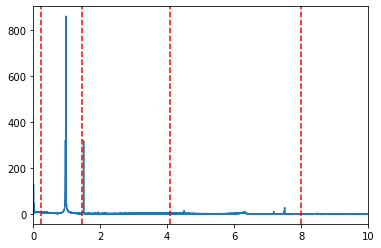

In [53]:
fft_l1 = np.fft.fft(archivos_laton[0][:,1]-np.mean(archivos_laton[0][:,1]))
frec = np.linspace(min(archivos_laton[0][:,0]), max(archivos_laton[0][:,0]), len(archivos_laton[0][:,0]))
plt.plot(frec, np.abs(fft_l1))
plt.axvline(w_l[0], linestyle = 'dashed', color = 'red')
plt.axvline(w_l[1], linestyle = 'dashed', color = 'red')
plt.axvline(w_l[2], linestyle = 'dashed', color = 'red')
plt.axvline(w_l[3], linestyle = 'dashed', color = 'red')
plt.xlim([0,10])